In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

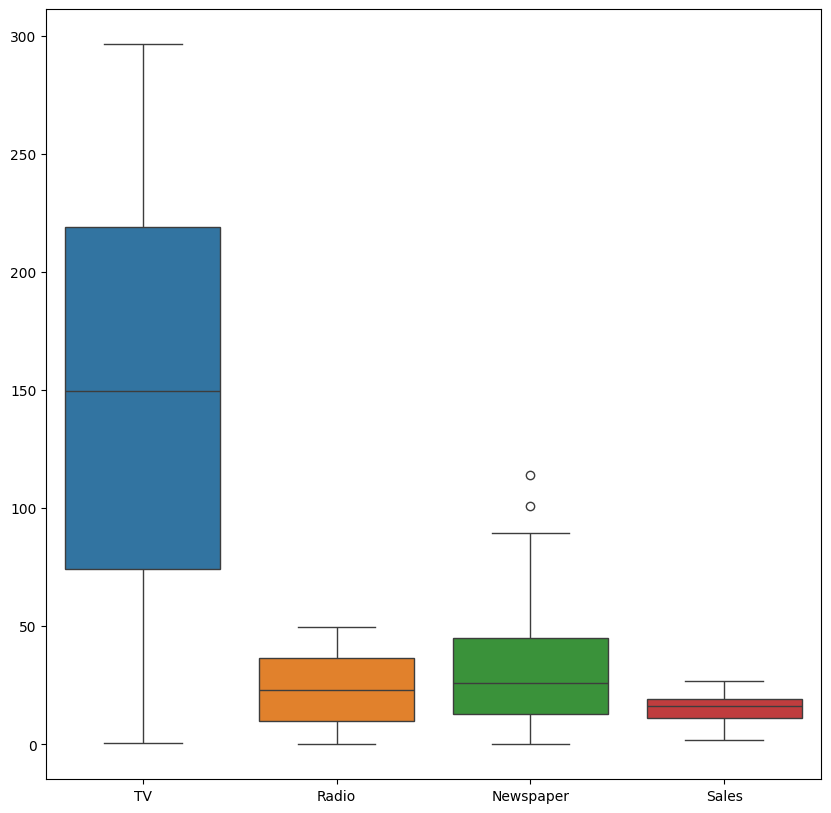

In [9]:
plt.figure(figsize = (10, 10))
sns.boxplot(df)

In [12]:
df = df[df['Newspaper'] < 100]

<Axes: >

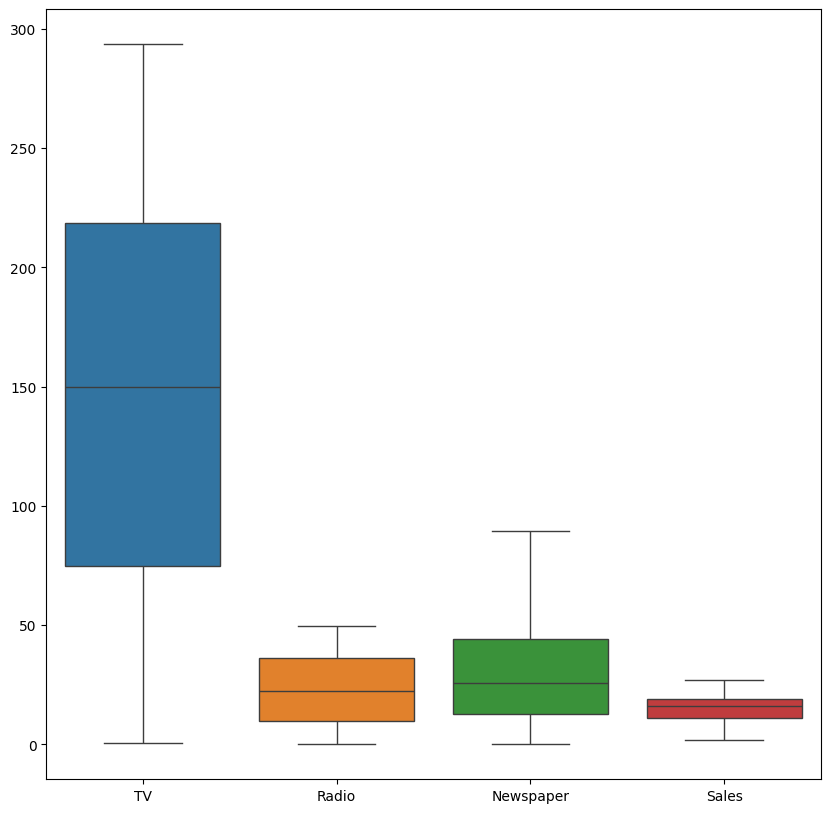

In [13]:
plt.figure(figsize = (10, 10))
sns.boxplot(df)

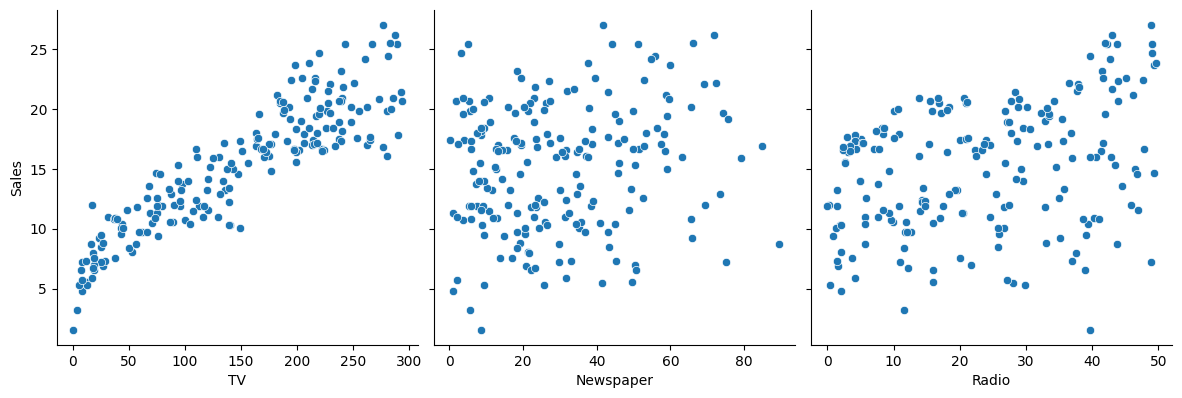

In [14]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop(['Sales'], axis = 1)
y =  df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_train

,TV,Radio,Newspaper
139,184.9,43.9,1.7
5,8.7,48.9,75.0
67,139.3,14.5,10.2
140,73.4,17.0,12.9
106,25.0,11.0,29.7
...,...,...,...
108,13.1,0.4,25.6
14,204.1,32.9,46.0
93,250.9,36.5,72.3
181,218.5,5.4,27.4


In [18]:
y_train

139    20.7
5       7.2
67     13.4
140    10.9
106     7.2
       ... 
108     5.3
14     19.0
93     22.2
181    17.2
104    20.7
Name: Sales, Length: 158, dtype: float64

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

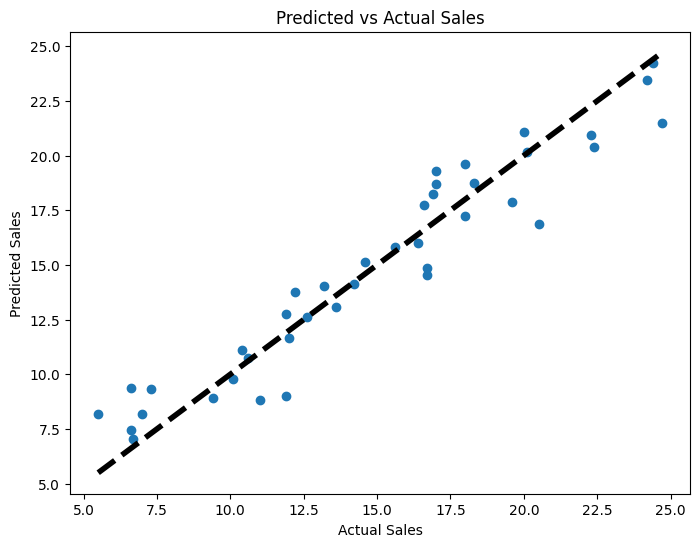

In [26]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()